# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

---

In [60]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [61]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" # Personal preference! If you require metric I can switch it.
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | enewetak
Processing Record 2 of Set 1 | darwin
Processing Record 3 of Set 1 | manicore
Processing Record 4 of Set 1 | basco
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | rio grande
Processing Record 8 of Set 1 | kayyerkan
Processing Record 9 of Set 1 | callao
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | xilin hot
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | peto
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | aykhal
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | fort st. john
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | ranot
Processing Record 22 of Set 1 | iqaluit
Processing Record 23 of Set 1 | grande prairie
Proces

In [62]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,81.82,76,50,19.62,MH,1702420707
1,darwin,-12.4611,130.8418,83.95,86,40,6.91,AU,1702420626
2,manicore,-5.8092,-61.3003,81.00,74,100,1.01,BR,1702420707
3,basco,20.4487,121.9702,78.94,74,0,22.10,PH,1702420707
4,bilibino,68.0546,166.4372,-8.28,96,100,3.80,RU,1702420707


In [64]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,81.82,76,50,19.62,MH,1702420707
1,darwin,-12.4611,130.8418,83.95,86,40,6.91,AU,1702420626
2,manicore,-5.8092,-61.3003,81.00,74,100,1.01,BR,1702420707
3,basco,20.4487,121.9702,78.94,74,0,22.10,PH,1702420707
4,bilibino,68.0546,166.4372,-8.28,96,100,3.80,RU,1702420707


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

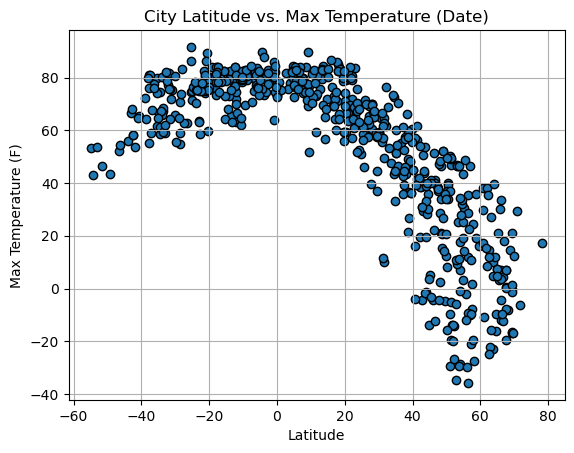

In [66]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

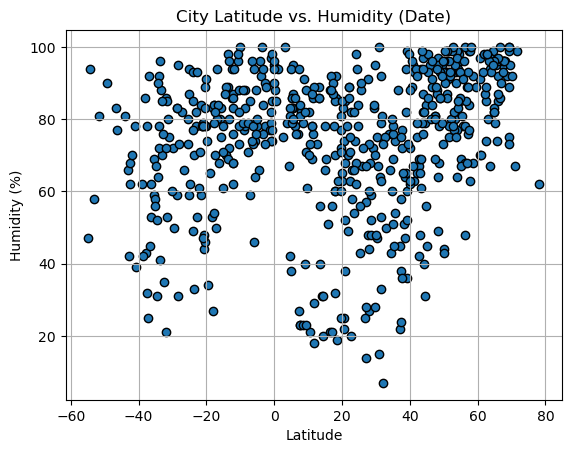

In [67]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

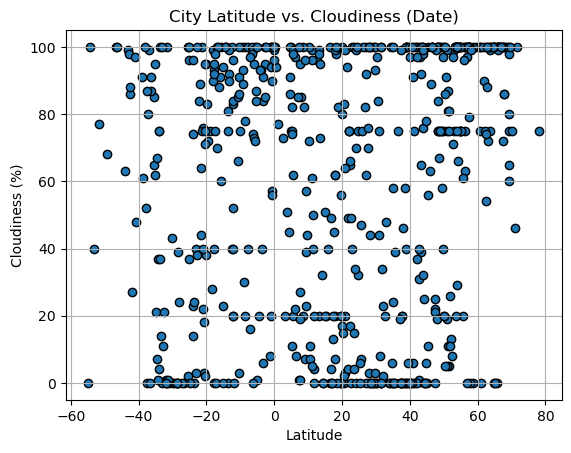

In [68]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

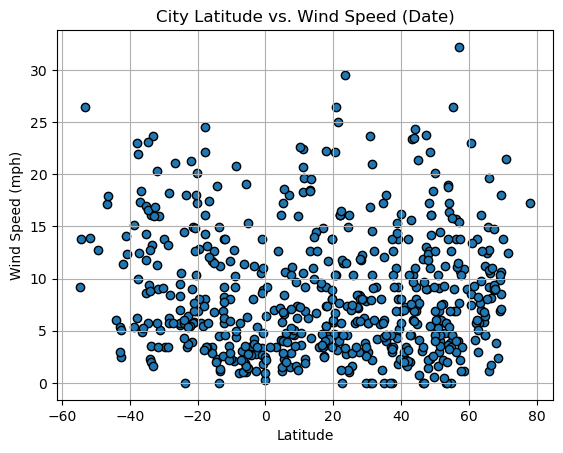

In [69]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,81.82,76,50,19.62,MH,1702420707
3,basco,20.4487,121.9702,78.94,74,0,22.10,PH,1702420707
4,bilibino,68.0546,166.4372,-8.28,96,100,3.80,RU,1702420707
5,qaqortoq,60.7167,-46.0333,29.75,97,100,7.47,GL,1702420707
7,kayyerkan,69.3786,87.7439,-16.71,75,100,8.52,RU,1702420708


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,darwin,-12.4611,130.8418,83.95,86,40,6.91,AU,1702420626
2,manicore,-5.8092,-61.3003,81.00,74,100,1.01,BR,1702420707
6,rio grande,-32.0350,-52.0986,77.11,86,0,20.33,BR,1702420708
8,callao,-12.0667,-77.1500,71.89,68,20,13.80,PE,1702420708
10,ushuaia,-54.8000,-68.3000,53.26,47,0,9.22,AR,1702420516


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.840894079233509


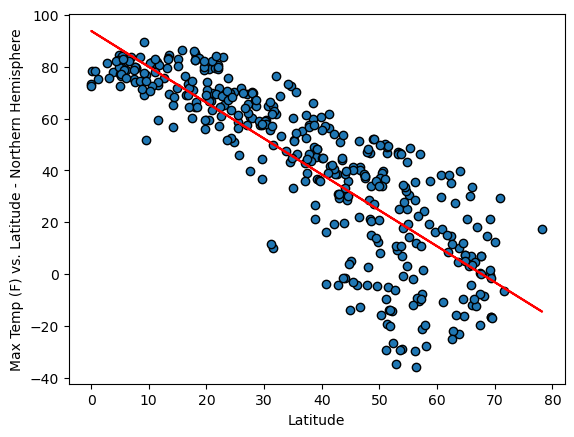

In [73]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Max Temp"],
                       "Max Temp (F) vs. Latitude - Northern Hemisphere", (45, 75))

The r-squared is: 0.610170916340845


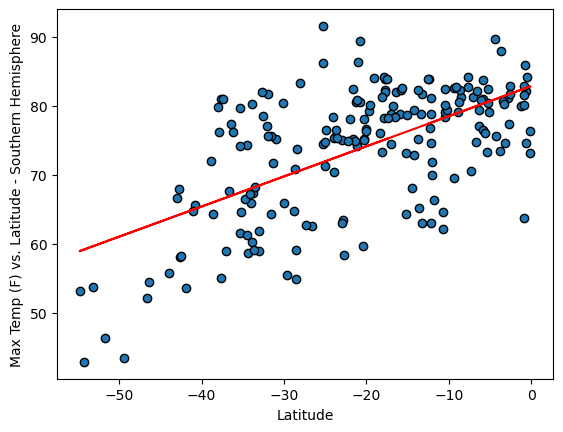

In [74]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                       "Max Temp (F) vs. Latitude - Southern Hemisphere", (0, 0))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.3652058909152833


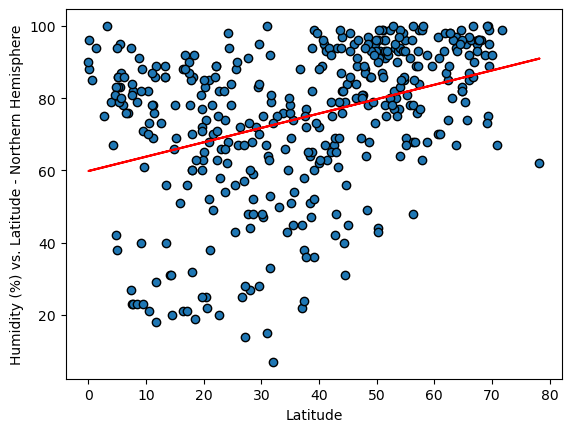

In [75]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Humidity"],
                       "Humidity (%) vs. Latitude - Northern Hemisphere", (40, 10))

The r-squared is: 0.3599583798953807


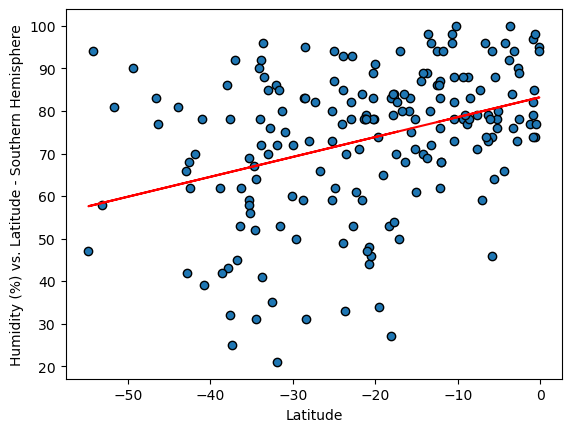

In [76]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Humidity"],
                       "Humidity (%) vs. Latitude - Southern Hemisphere", (40, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2582715263618128


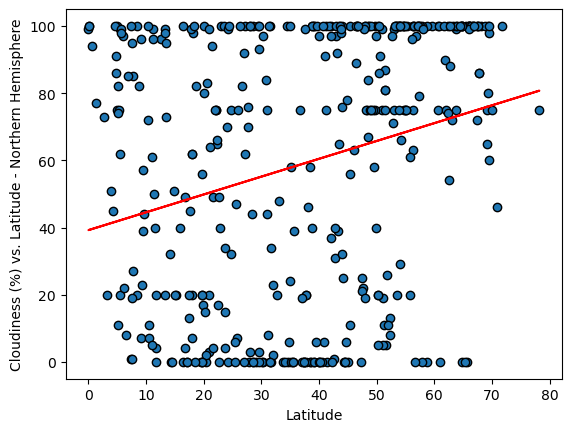

In [77]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       "Cloudiness (%) vs. Latitude - Northern Hemisphere", (30, 30))

The r-squared is: 0.19256491652808724


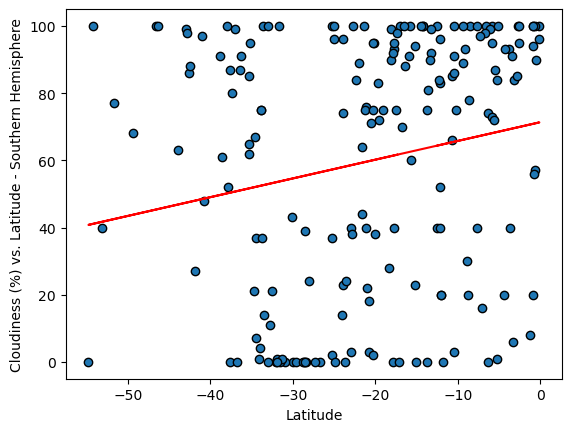

In [78]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       "Cloudiness (%) vs. Latitude - Southern Hemisphere", (30, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05766262160308596


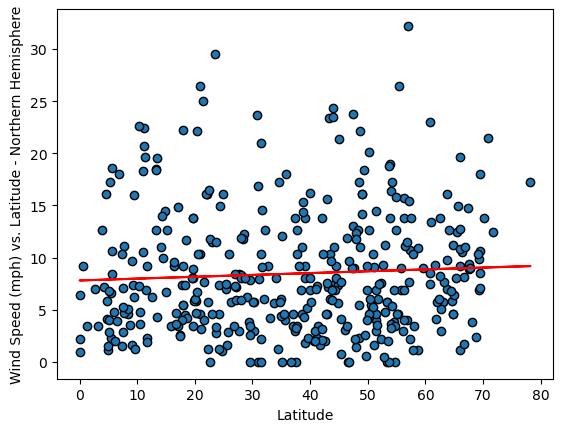

In [79]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"],
                       "Wind Speed (mph) vs. Latitude - Northern Hemisphere", (40, 25))

The r-squared is: -0.36668955741039533


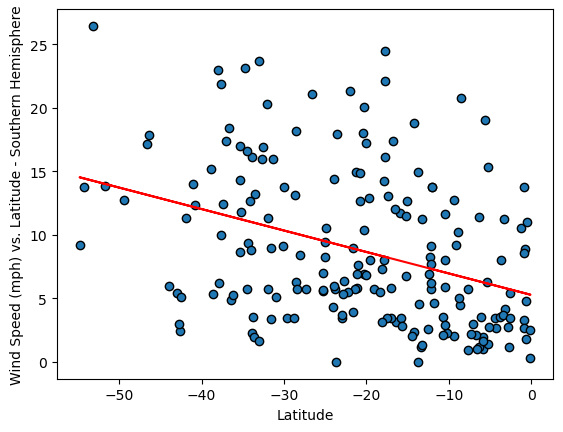

In [80]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"],
                       "Wind Speed (mph) vs. Latitude - Southern Hemisphere", (40, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE